In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import io
import base64

In [2]:
# Load data
file_path = '../data/weather_classification_data.csv'  # Ganti dengan path file CSV Anda
df = pd.read_csv(file_path)

In [3]:
# Data Preprocessing
# Mengatasi missing values (jika ada)
df = df.dropna()

# Mengonversi variabel kategorikal ke bentuk numerik
categorical_vars = ['Cloud Cover', 'Season', 'Location', 'Weather Type']
for var in categorical_vars:
    le = LabelEncoder()
    df[var] = le.fit_transform(df[var])

# Memisahkan fitur dan target
X = df.drop('Weather Type', axis=1)
y = df['Weather Type']

# Membagi data menjadi training dan testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standarisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Dictionary to store the results
results = []

In [4]:
# Training and Evaluation
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'SVM': SVC(probability=True),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(100,), max_iter=300)
}

In [5]:
for model_name, model in models.items():
    # Training
    model.fit(X_train, y_train)
    
    # Save the model
    model_file = f'../models/{model_name.replace(" ", "_").lower()}_model.joblib'
    joblib.dump(model, model_file)
    
    # Prediction
    y_pred = model.predict(X_test)
    
    # Evaluation
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Classification Report': report
    })
    
    # Save results to CSV
    result_df = pd.DataFrame(results)
    result_df.to_csv(f'../results/{model_name.replace(" ", "_").lower()}_results.csv', index=False)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Convert confusion matrix to DataFrame
    cm_df = pd.DataFrame(cm, index=[f'Actual {i}' for i in range(cm.shape[0])],
                        columns=[f'Predicted {i}' for i in range(cm.shape[1])])
    
    # Display confusion matrix in text form
    print(f'Confusion Matrix for {model_name}:')
    print(cm_df)
    
    # Save confusion matrix to CSV
    cm_df.to_csv(f'../results/{model_name.replace(" ", "_").lower()}_confusion_matrix.csv', index=True)
    
    # Visualize confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=[f'Predicted {i}' for i in range(cm.shape[1])],
                yticklabels=[f'Actual {i}' for i in range(cm.shape[0])])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('Actual Labels')
    
    # Save the plot as PNG file
    plt.savefig(f'../results/{model_name.replace(" ", "_").lower()}_confusion_matrix.png')
    
    # Convert plot to base64 to display in text
    buffer = io.BytesIO()
    plt.savefig(buffer, format='png')
    buffer.seek(0)
    image_base64 = base64.b64encode(buffer.getvalue()).decode('utf-8')
    buffer.close()
    
    # Display image in base64 format
    print("\nGambar Confusion Matrix (dalam format base64):")
    print(image_base64)
    
    # Show plot
    plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'models/decision_tree_model.joblib'

Comparison of Model Accuracies
            Model  Accuracy
1   Random Forest  0.913636
0   Decision Tree  0.907197
2             SVM  0.906818
3  Neural Network  0.903788


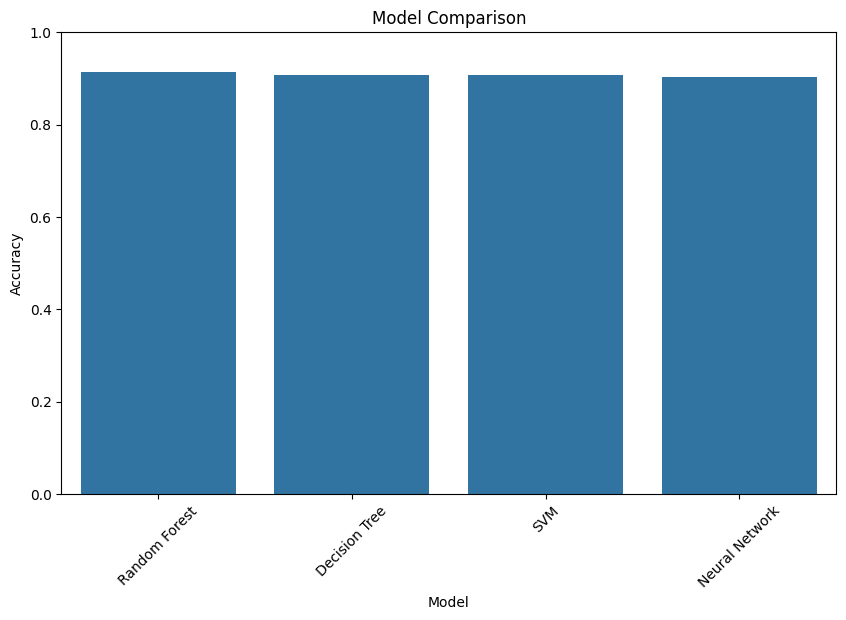

In [ ]:
# Compare accuracies in a table
acc_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)
print("Comparison of Model Accuracies")
print(acc_df[['Model', 'Accuracy']])

# Plot accuracy comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=acc_df)
plt.title('Model Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Save the best model
best_model_info = max(results, key=lambda x: x['Accuracy'])
best_model_name = best_model_info['Model']
best_model_file = f'{best_model_name.replace(" ", "_").lower()}_model.joblib'
best_model = joblib.load(best_model_file)

In [ ]:
# Test accuracy of the best model
best_model_y_pred = best_model.predict(X_test)
best_model_accuracy = accuracy_score(y_test, best_model_y_pred)
print(f'Best Model: {best_model_name} with Accuracy: {best_model_accuracy:.4f}')
print(classification_report(y_test, best_model_y_pred))

Best Model: Random Forest with Accuracy: 0.9136
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       651
           1       0.92      0.90      0.91       647
           2       0.94      0.95      0.94       701
           3       0.94      0.90      0.92       641

    accuracy                           0.91      2640
   macro avg       0.91      0.91      0.91      2640
weighted avg       0.91      0.91      0.91      2640

